In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score


In [5]:
# Load dataset
df = pd.read_csv("/content/Heart diesease Prediction.csv")
df.head(100)

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,53,1,0,142,226,0,0,111,1,0.0,2,0,3,1
96,62,0,0,140,394,0,0,157,0,1.2,1,0,2,1
97,52,1,0,108,233,1,1,147,0,0.1,2,3,3,1
98,43,1,2,130,315,0,1,162,0,1.9,2,1,2,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  303 non-null    int64  
 1   gender               303 non-null    int64  
 2   chest_pain           303 non-null    int64  
 3   rest_bps             303 non-null    int64  
 4   cholestrol           303 non-null    int64  
 5   fasting_blood_sugar  303 non-null    int64  
 6   rest_ecg             303 non-null    int64  
 7   thalach              303 non-null    int64  
 8   exer_angina          303 non-null    int64  
 9   old_peak             303 non-null    float64
 10  slope                303 non-null    int64  
 11  ca                   303 non-null    int64  
 12  thalassemia          303 non-null    int64  
 13  target               303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.describe()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


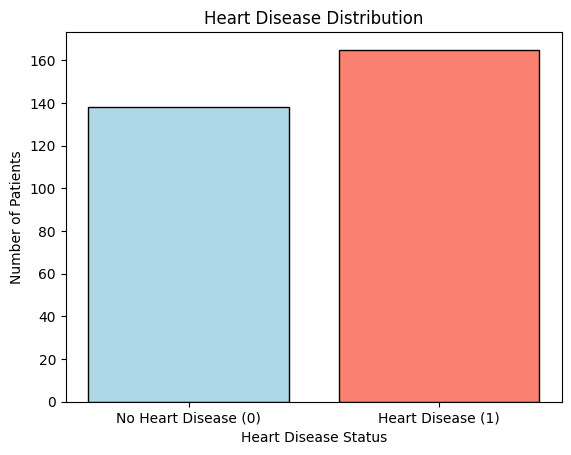

In [8]:
counts = df["target"].value_counts().sort_index()
plt.bar(counts.index, counts.values, color=["lightblue", "salmon"], edgecolor="black")
plt.xticks([0, 1], ["No Heart Disease (0)", "Heart Disease (1)"])
plt.xlabel("Heart Disease Status")
plt.ylabel("Number of Patients")
plt.title("Heart Disease Distribution")
plt.show()


In [9]:
# Check for null values
df.isna().sum()

,0
age,0
gender,0
chest_pain,0
rest_bps,0
cholestrol,0
fasting_blood_sugar,0
rest_ecg,0
thalach,0
exer_angina,0
old_peak,0


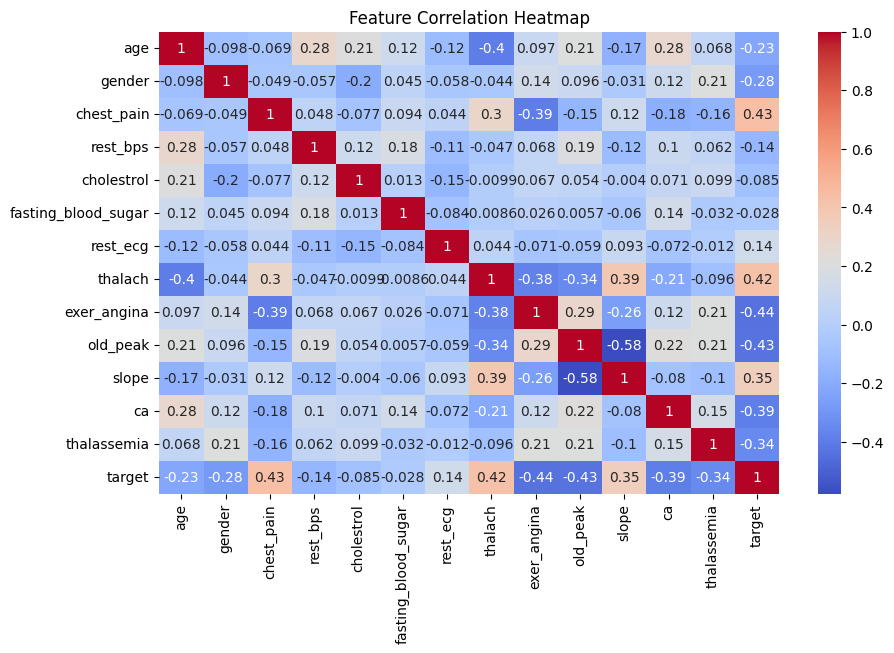

In [10]:

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

In [11]:
# Split features (X) and target (y)
X = df.drop("target", axis=1)
y = df["target"]

In [12]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
#Training Data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [14]:
#Model Training
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [15]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=5,
    random_state=42
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.8688524590163934
[[24  5]
 [ 3 29]]
              precision    recall  f1-score   support

           0       0.89      0.83      0.86        29
           1       0.85      0.91      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [16]:
from sklearn.svm import SVC

svm = SVC(
    kernel='rbf',
    C=1.0,
    gamma='scale',
    probability=True,
    random_state=42
)

svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.8688524590163934
[[26  3]
 [ 5 27]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [17]:
# Predictions
y_pred_log = log_model.predict(X_test)
# Evaluation
print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("Classification Report:\n", classification_report(y_test, y_pred_log))


Logistic Regression
Accuracy: 0.8524590163934426
Confusion Matrix:
 [[25  4]
 [ 5 27]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [18]:
# Predictions
y_pred_tree = tree_model.predict(X_test)
# Evaluation
print(" Decision Tree")
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))
print("Classification Report:\n", classification_report(y_test, y_pred_tree))


 Decision Tree
Accuracy: 0.7540983606557377
Confusion Matrix:
 [[25  4]
 [11 21]]
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.86      0.77        29
           1       0.84      0.66      0.74        32

    accuracy                           0.75        61
   macro avg       0.77      0.76      0.75        61
weighted avg       0.77      0.75      0.75        61



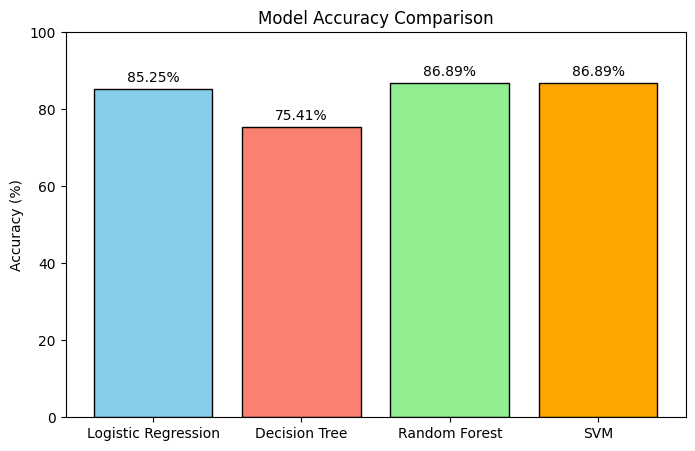

In [22]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

accuracies = [
    accuracy_score(y_test, y_pred_log) * 100,
    accuracy_score(y_test, y_pred_tree) * 100,
    accuracy_score(y_test, y_pred_rf) * 100,
    accuracy_score(y_test, y_pred_svm) * 100
]

models = [
    "Logistic Regression",
    "Decision Tree",
    "Random Forest",
    "SVM"
]

plt.figure(figsize=(8,5))
bars = plt.bar(
    models,
    accuracies,
    color=["skyblue", "salmon", "lightgreen", "orange"],
    edgecolor="black"
)

plt.ylabel("Accuracy (%)")
plt.title("Model Accuracy Comparison")

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height + 1,
        f"{height:.2f}%",
        ha="center",
        va="bottom",
        fontsize=10
    )

plt.ylim(0, 100)
plt.show()


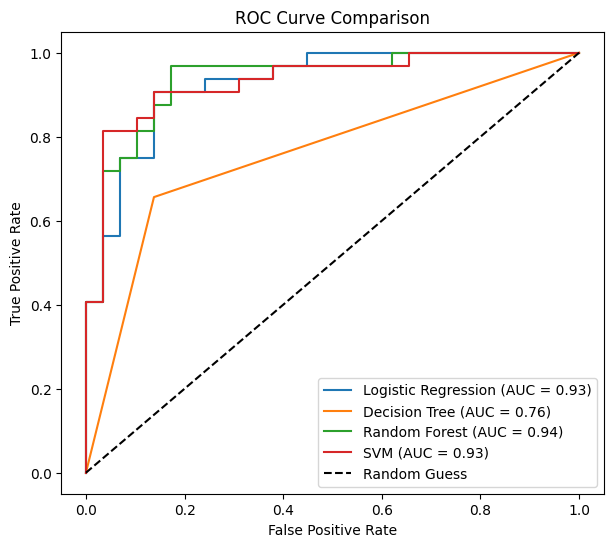

In [24]:
from sklearn.metrics import roc_curve, auc

# Probability scores
y_prob_log = log_model.predict_proba(X_test)[:, 1]
y_prob_tree = tree_model.predict_proba(X_test)[:, 1]
y_prob_rf = rf.predict_proba(X_test)[:, 1]
y_prob_svm = svm.predict_proba(X_test)[:, 1]

# ROC values
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_prob_tree)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)

# AUC scores
auc_log = auc(fpr_log, tpr_log)
auc_tree = auc(fpr_tree, tpr_tree)
auc_rf = auc(fpr_rf, tpr_rf)
auc_svm = auc(fpr_svm, tpr_svm)

plt.figure(figsize=(7,6))
plt.plot(fpr_log, tpr_log, label=f"Logistic Regression (AUC = {auc_log:.2f})")
plt.plot(fpr_tree, tpr_tree, label=f"Decision Tree (AUC = {auc_tree:.2f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.2f})")
plt.plot(fpr_svm, tpr_svm, label=f"SVM (AUC = {auc_svm:.2f})")

plt.plot([0,1], [0,1], "k--", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

In [21]:
sample_patient = { 'age': 58, 'gender': 1, 'chest_pain': 2,
    'rest_bps': 140,'cholestrol': 250,'fasting_blood_sugar': 0,'rest_ecg': 1,'thalach': 150,
    'exer_angina': 1,'old_peak': 1.5,'slope': 2,'ca': 1,'thalassemia': 3 }

sample_df = pd.DataFrame([sample_patient])
sample_scaled = scaler.transform(sample_df)

# Predict
pred = log_model.predict(sample_scaled)[0]
pred_prob = log_model.predict_proba(sample_scaled)[0,1]

print("\nPrediction ->", pred, " (1 = Heart Disease, 0 = No Heart Disease)")
print("Predicted Probability of Heart Disease:", round(pred_prob, 3))


Prediction -> 0  (1 = Heart Disease, 0 = No Heart Disease)
Predicted Probability of Heart Disease: 0.242
